# Student Grade Regression - Math - XGBoost

## Import base libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data preprocessing

In [ ]:
df = pd.read_csv('student-mat.csv')  # Math class
# df = pd.read_csv('student-por.csv')  # Portuguese class
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(395, 32) (395,)


In [ ]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Identify all categorical columns
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [ ]:
# Identify all numerical columns
obj_df = df.select_dtypes(include=['int64']).copy()
obj_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Check for missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# Categorical Columns (indices) - 0:1, 3:5, 8:11, 15:22
from sklearn.preprocessing import LabelEncoder

# Label Encode - 0:1, 3:5, 15:22
le = LabelEncoder()
# le_columns = X[:, [0, 1, 3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22]]

# for i in X[:]:
#   if i in le_columns:
#     X[:, i] = le.fit_transform(X[:, i])

# Encode nominal attributes
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 9] = le.fit_transform(X[:, 9])
X[:, 10] = le.fit_transform(X[:, 10])
X[:, 11] = le.fit_transform(X[:, 11])

# Encode binary attributes
X[:, 15] = le.fit_transform(X[:, 15])
X[:, 16] = le.fit_transform(X[:, 16])
X[:, 17] = le.fit_transform(X[:, 17])
X[:, 18] = le.fit_transform(X[:, 18])
X[:, 19] = le.fit_transform(X[:, 19])
X[:, 20] = le.fit_transform(X[:, 20])
X[:, 21] = le.fit_transform(X[:, 21])
X[:, 22] = le.fit_transform(X[:, 22])

print(X)

[[0 0 18 ... 6 5 6]
 [0 0 17 ... 4 5 5]
 [0 0 15 ... 10 7 8]
 ...
 [1 1 21 ... 3 10 8]
 [1 1 18 ... 0 11 12]
 [1 1 19 ... 5 8 9]]


In [ ]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Apply PCA (dimensionality reduction)
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

## Define XGBoost model

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

reg = XGBRegressor(max_depth=14, min_child_weight=4, gamma=0.01, 
                   colsample_bytree=0.88, subsample=1, reg_alpha=0.9,
                   learning_rate=0.1, n_estimators=111, random_state=0)
reg.fit(X_train, y_train)

[14:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.88, gamma=0.01,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=14, min_child_weight=4, missing=None, n_estimators=111,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Evaluate model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict test set results
y_pred = reg.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
print('')

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))


[[13.44 14.  ]
 [10.93 10.  ]
 [10.06  9.  ]
 [15.16 15.  ]
 [15.35 16.  ]
 [12.16 12.  ]
 [12.67 14.  ]
 [10.97 11.  ]
 [ 9.27  9.  ]
 [14.13 15.  ]
 [ 8.15 10.  ]
 [10.69 11.  ]
 [11.26 10.  ]
 [ 8.93  8.  ]
 [13.55 15.  ]
 [13.32 14.  ]
 [12.92 12.  ]
 [ 9.46  0.  ]
 [ 9.6  10.  ]
 [14.11 16.  ]
 [ 8.28  0.  ]
 [ 4.67  0.  ]
 [ 6.94  8.  ]
 [13.87 16.  ]
 [12.18 12.  ]
 [16.15 15.  ]
 [10.28 10.  ]
 [18.36 19.  ]
 [ 4.14  0.  ]
 [13.37 14.  ]
 [ 3.71  0.  ]
 [ 8.71 10.  ]
 [ 8.22  8.  ]
 [ 6.34  4.  ]
 [12.95 13.  ]
 [10.73 10.  ]
 [12.67 13.  ]
 [17.28 18.  ]
 [ 9.51  8.  ]
 [11.75 11.  ]
 [ 5.33  6.  ]
 [18.06 18.  ]
 [ 7.45  8.  ]
 [ 9.54  8.  ]
 [10.13 11.  ]
 [ 3.59  0.  ]
 [11.65 13.  ]
 [ 4.39  0.  ]
 [12.25 13.  ]
 [ 8.39  7.  ]
 [ 9.71 10.  ]
 [17.79 18.  ]
 [10.91 10.  ]
 [ 7.29  9.  ]
 [11.81 11.  ]
 [ 9.13  6.  ]
 [ 9.6   9.  ]
 [12.73 13.  ]
 [13.58 15.  ]
 [12.86 14.  ]
 [12.99 14.  ]
 [14.04 15.  ]
 [13.25 14.  ]
 [14.32 15.  ]
 [ 8.87  0.  ]
 [14.36 15.  ]
 [17.3  19

<table border = "1">
  <thead>
    <th colspan = "5">Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>1.648</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>7.176</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>2.679</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.740</td>
    </tr>
  </tbody>
</table>

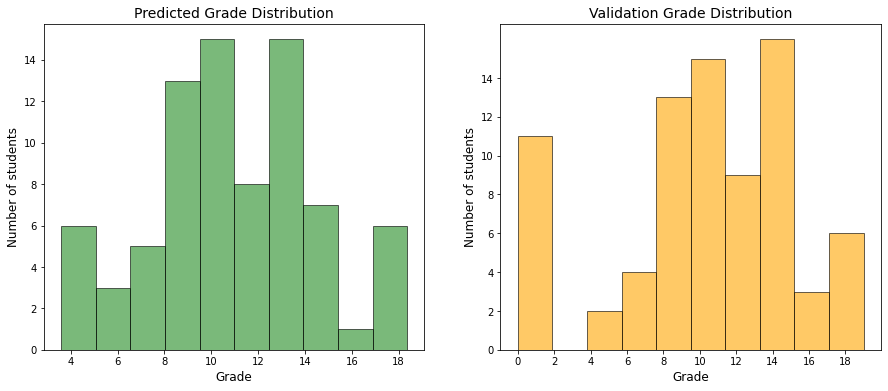

In [ ]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 16, 2))
plt.hist(x=y_pred, facecolor='forestgreen', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Predicted Grade Distribution', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 20, 2))
plt.yticks(np.arange(0, 16, 2))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Number of students', fontsize=12)
plt.title('Validation Grade Distribution', fontsize=14)

# Show subplot
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 1 --

R^2 Scoring:
Mean: 0.864157
Std: +/- 0.029866
Min: 0.803269
Max: 0.892337

RMSE Scoring:
Mean: 1.605443
Std: +/- 0.143595
Min: 1.468639
Max: 1.906592



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 2 --

R^2 Scoring:
Mean: 0.884489
Std: +/- 0.013334
Min: 0.865986
Max: 0.904269

RMSE Scoring:
Mean: 1.489030
Std: +/- 0.089222
Min: 1.355130
Max: 1.614801



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 3 --

R^2 Scoring:
Mean: 0.874957
Std: +/- 0.040590
Min: 0.794014
Max: 0.921984

RMSE Scoring:
Mean: 1.530411
Std: +/- 0.238166
Min: 1.203471
Max: 1.995947



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 4 --

R^2 Scoring:
Mean: 0.882082
Std: +/- 0.045176
Min: 0.783907
Max: 0.948265

RMSE Scoring:
Mean: 1.476410
Std: +/- 0.288184
Min: 1.033224
Max: 2.021818



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 5 --

R^2 Scoring:
Mean: 0.887846
Std: +/- 0.039220
Min: 0.808348
Max: 0.930774

RMSE Scoring:
Mean: 1.442281
Std: +/- 0.222864
Min: 1.163295
Max: 1.896174



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=7.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 6 --

R^2 Scoring:
Mean: 0.886243
Std: +/- 0.066566
Min: 0.657652
Max: 0.969472

RMSE Scoring:
Mean: 1.424169
Std: +/- 0.374177
Min: 0.756223
Max: 2.540419



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 7 --

R^2 Scoring:
Mean: 0.895149
Std: +/- 0.036846
Min: 0.810464
Max: 0.960563

RMSE Scoring:
Mean: 1.391910
Std: +/- 0.242635
Min: 0.823991
Max: 1.887375



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=9.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 


-- Fold: 8 --

R^2 Scoring:
Mean: 0.894739
Std: +/- 0.045798
Min: 0.777222
Max: 0.971717

RMSE Scoring:
Mean: 1.388043
Std: +/- 0.305999
Min: 0.741592
Max: 2.031801



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 9 --

R^2 Scoring:
Mean: 0.899910
Std: +/- 0.040926
Min: 0.803722
Max: 0.971442

RMSE Scoring:
Mean: 1.354652
Std: +/- 0.295678
Min: 0.725625
Max: 1.945327



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class


-- Fold: 10 --

R^2 Scoring:
Mean: 0.903937
Std: +/- 0.048131
Min: 0.804352
Max: 0.978623

RMSE Scoring:
Mean: 1.310674
Std: +/- 0.371314
Min: 0.666226
Max: 2.106474



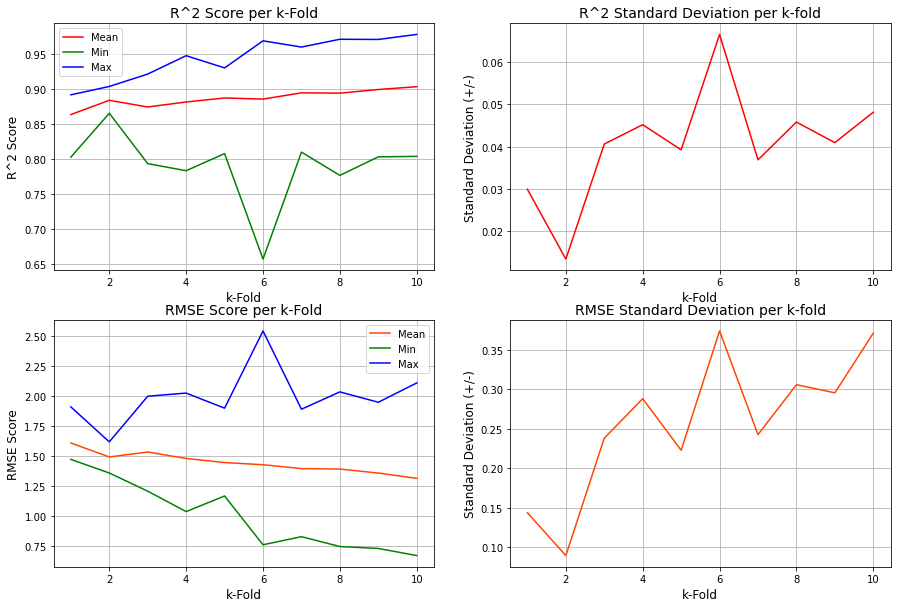

In [ ]:
# Apply k-Fold Cross Validation on the training set
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Lists of values
r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
# Cross validate for 10 k-folds, each with 3 repeats
for k in range(2, 12):
  cv = RepeatedStratifiedKFold(n_splits = k, n_repeats = 3, random_state = 0)
  r2_scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  # scores = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  rmse_scores = cross_val_score(reg, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  
  # Force scores to be positive
  r2_scores = abs(r2_scores)
  rmse_scores = abs(rmse_scores)

  # Print values
  print('')
  print('-- Fold: %d --' % (k-1))
  print('')
  print('R^2 Scoring:')
  print("Mean: %f" % (np.mean(r2_scores)))
  print("Std: +/- %f" % (np.std(r2_scores)))
  print("Min: %f" % (np.min(r2_scores)))
  print("Max: %f" % (np.max(r2_scores)))
  
  print('')
  print('RMSE Scoring:')
  print("Mean: %f" % (np.mean(rmse_scores)))
  print("Std: +/- %f" % (np.std(rmse_scores)))
  print("Min: %f" % (np.min(rmse_scores)))
  print("Max: %f" % (np.max(rmse_scores)))
  print('')
  
  # Append R^2 scores
  r2_means.append(np.mean(r2_scores))
  r2_stds.append(np.std(r2_scores))
  r2_mins.append(np.min(r2_scores))
  r2_maxs.append(np.max(r2_scores))
  
  # Append RMSE scores
  rmse_means.append(np.mean(rmse_scores))
  rmse_stds.append(np.std(rmse_scores))
  rmse_mins.append(np.min(rmse_scores))
  rmse_maxs.append(np.max(rmse_scores))

# Plot R^2 scores per k-fold:
fig2 = plt.figure(figsize=(15, 10))
ax1 = fig2.add_subplot(2, 2, 1)
ax1.plot(np.arange(1,11), r2_means, color='red', label='Mean')
ax1.plot(np.arange(1,11), r2_mins, color='green', label='Min')
ax1.plot(np.arange(1,11), r2_maxs, color='blue', label='Max')
ax1.set_xlabel('k-Fold', fontsize=12)
ax1.set_ylabel('R^2 Score', fontsize=12)
ax1.set_title('R^2 Score per k-Fold', fontsize=14)
ax1.legend()
ax1.grid(True)

# Plot R^2 Standard Deviations per k-fold:
ax2 = fig2.add_subplot(2, 2, 2)
ax2.plot(np.arange(1,11), r2_stds, color='red')
ax2.set_xlabel('k-Fold', fontsize=12)
ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
ax2.grid(True)

# Plot RMSE scores per k-fold:
ax3 = fig2.add_subplot(2, 2, 3)
ax3.plot(np.arange(1,11), rmse_means, color='orangered', label='Mean')
ax3.plot(np.arange(1,11), rmse_mins, color='green', label='Min')
ax3.plot(np.arange(1,11), rmse_maxs, color='blue', label='Max')
ax3.set_xlabel('k-Fold', fontsize=12)
ax3.set_ylabel('RMSE Score', fontsize=12)
ax3.set_title('RMSE Score per k-Fold', fontsize=14)
ax3.legend()
ax3.grid(True)

# Plot RMSE Standard Deviations per k-fold:
ax4 = fig2.add_subplot(2, 2, 4)
ax4.plot(np.arange(1,11), rmse_stds, color='orangered')
ax4.set_xlabel('k-Fold', fontsize=12)
ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
ax4.grid(True)

# Show subplot
plt.show()


##### Cross-Validation Results for R^2 Scoring

<table border = "1">
  <thead>
    <th colspan = "3">Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.904</td>
      <td>1.311</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.048</td>
      <td>0.371</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.804</td>
      <td>0.666</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.979</td>
      <td>2.107</td>
    </tr>
  </tbody>
</table>

In [ ]:
# Apply Grid Search for parameter tuning
from sklearn.model_selection import GridSearchCV

# param_dict = {'max_depth': [1, 2, 5, 10, 20], 
#               'learning_rate': [0.05, 0.1, 0.15],
#               'reg_alpha':[0.001, 0.01, 0.1, 1, 10, 100],
#               'colsample_bytree': [0.3, 0.5, 0.7],
#               'n_estimators': [50, 100, 150, 200],
#               'min_child_weight': [2, 5, 10],
#               'gamma': [0, 0.05, 0.1],
#               'subsample': [0.6, 0.8, 1.0],
#               'random_state': [0, 1, 5, 10, 20, 40]}

# R2 scoring
param_dict = {'max_depth': [14], 
              'min_child_weight': [4],
              'gamma': [0.01],
              'colsample_bytree': [0.9], 
              'subsample': [1],
              'reg_alpha': [0.9],
              'learning_rate': [0.1],
              'n_estimators': [111],
              'random_state': [0]}

# grid = GridSearchCV(reg, param_dict, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(reg, param_dict, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# grid = GridSearchCV(reg, param_dict, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
grid = GridSearchCV(reg, param_dict, scoring='r2', cv=cv, n_jobs=-1)
results = grid.fit(X_train, y_train)

# Summarize results
best_score = grid.best_score_
best_parameters = grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R^2 Scoring
# print("Best Score: %.3f%%" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  % (min_groups, self.n_splits)), UserWarning)


[14:33:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 90.394%
Best Parameters:  {'colsample_bytree': 0.9, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 14, 'min_child_weight': 4, 'n_estimators': 111, 'random_state': 0, 'reg_alpha': 0.9, 'subsample': 1}


##### Grid Search Results

<table border = "1">
  <thead>
    <th colspan = "2">Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Best Score</b></td>
      <td>90.394%</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>14</td>
    </tr>
    <tr>
      <td><b>min_child_weight</b></td>
      <td>4</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0.01</td>
    </tr>
    <tr>
      <td><b>colsample_bytree</b></td>
      <td>0.89</td>
    </tr>
    <tr>
      <td><b>subsample</b></td>
      <td>1</td>
    </tr>
    <tr>
      <td><b>reg_alpha</b></td>
      <td>0.9</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.1</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>111</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>